In [1]:
# Predicción de Churn - Exploración Inicial
# Autor: Erik
# Curso: Transformación Digital a través de la IA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Carga del dataset (verifica que el archivo esté en la carpeta /data/)
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

# Vista previa
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Tamaño del dataset
print("Número de filas y columnas:", df.shape)

# Tipos de datos y presencia de valores nulos
df.info()

# Estadísticas descriptivas para variables numéricas
df.describe()

Número de filas y columnas: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pap

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# Revisión rápida de valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Revisión de valores que parecen vacíos (espacios en blanco, strings vacíos)
print("\nValores vacíos en columnas tipo texto:")
for col in df.columns:
    if df[col].dtype == 'object':
        vacios = df[df[col].str.strip() == ''].shape[0]
        if vacios > 0:
            print(f"- {col}: {vacios} valores vacíos")


Valores nulos por columna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Valores vacíos en columnas tipo texto:
- TotalCharges: 11 valores vacíos


In [5]:
# Reemplazar espacios vacíos por NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Ver cuántos quedan como NaN ahora
print("Nulos en TotalCharges después del reemplazo:", df['TotalCharges'].isnull().sum())

# Eliminar filas con TotalCharges vacío
df = df.dropna(subset=['TotalCharges'])

# Convertir la columna a float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Verificación
print("\nTotalCharges convertido a:", df['TotalCharges'].dtype)


Nulos en TotalCharges después del reemplazo: 11

TotalCharges convertido a: float64


C:\Users\braco\AppData\Local\Temp\ipykernel_2668\1260290159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


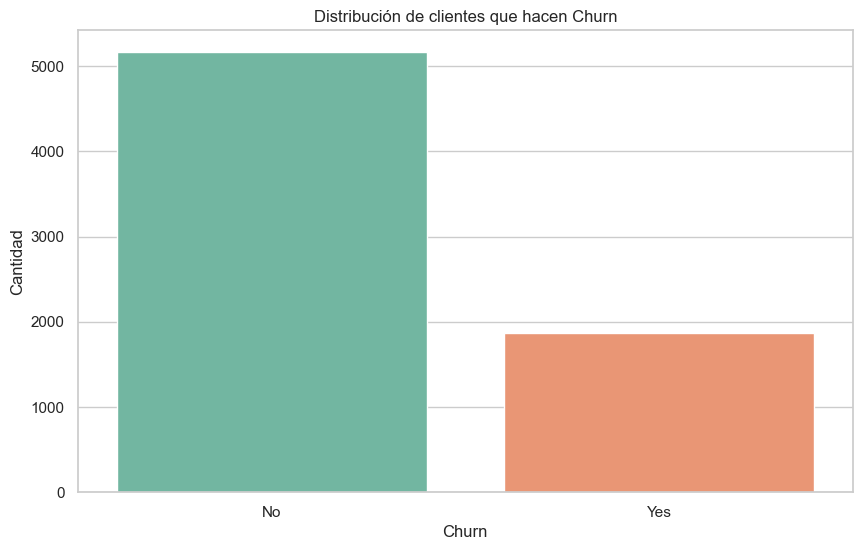

Porcentaje de Churn vs No Churn:
Churn
No     73.42
Yes    26.58
Name: proportion, dtype: float64


In [6]:
# Conteo de valores en la variable objetivo
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Distribución de clientes que hacen Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad')
plt.show()

# Porcentaje
porcentaje = df['Churn'].value_counts(normalize=True) * 100
print("Porcentaje de Churn vs No Churn:")
print(porcentaje.round(2))


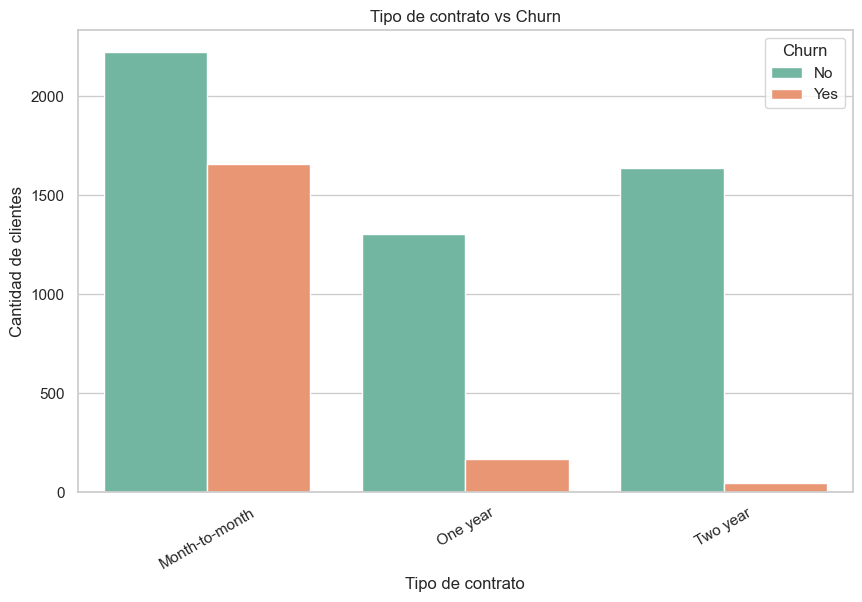


--- Porcentaje de clientes que hacen churn por tipo de contrato ---
Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.72  11.28
Two year        97.15   2.85

🔍 Conclusión:
- Los clientes con contrato 'Month-to-month' tienen la tasa de churn más alta.
- Los contratos de 'One year' y 'Two year' retienen a más del 85% de los clientes.


In [15]:
# Gráfico: Tipo de contrato vs churn
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Tipo de contrato vs Churn')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=30)
plt.show()

# Análisis de porcentajes
print("\n--- Porcentaje de clientes que hacen churn por tipo de contrato ---")
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
print(contract_churn.round(2))

# Interpretación rápida
print("\n🔍 Conclusión:")
print("- Los clientes con contrato 'Month-to-month' tienen la tasa de churn más alta.")
print("- Los contratos de 'One year' y 'Two year' retienen a más del 85% de los clientes.")


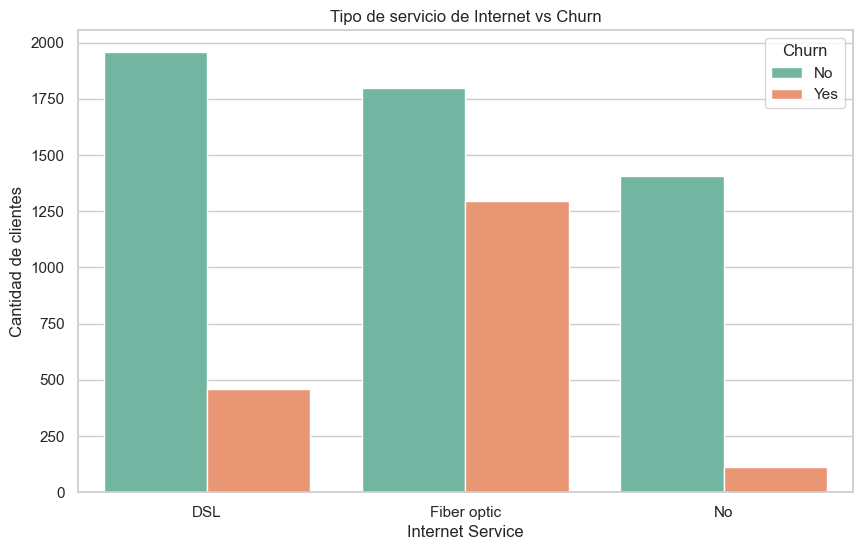


--- Porcentaje de Churn por tipo de servicio de Internet ---
Churn               No    Yes
InternetService              
DSL              81.00  19.00
Fiber optic      58.11  41.89
No               92.57   7.43

🔍 Conclusión:
- Los clientes con 'Fiber optic' tienen la tasa de churn más alta.
- Los que no tienen servicio de Internet presentan la tasa de churn más baja.
- 'DSL' tiene un churn intermedio, pero también muestra fidelidad moderada.


In [16]:
# Gráfico: Tipo de internet vs churn
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set2')
plt.title('Tipo de servicio de Internet vs Churn')
plt.xlabel('Internet Service')
plt.ylabel('Cantidad de clientes')
plt.show()

# Porcentaje de churn por tipo de internet
print("\n--- Porcentaje de Churn por tipo de servicio de Internet ---")
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
print(internet_churn.round(2))

# Conclusiones clave
print("\n🔍 Conclusión:")
print("- Los clientes con 'Fiber optic' tienen la tasa de churn más alta.")
print("- Los que no tienen servicio de Internet presentan la tasa de churn más baja.")
print("- 'DSL' tiene un churn intermedio, pero también muestra fidelidad moderada.")


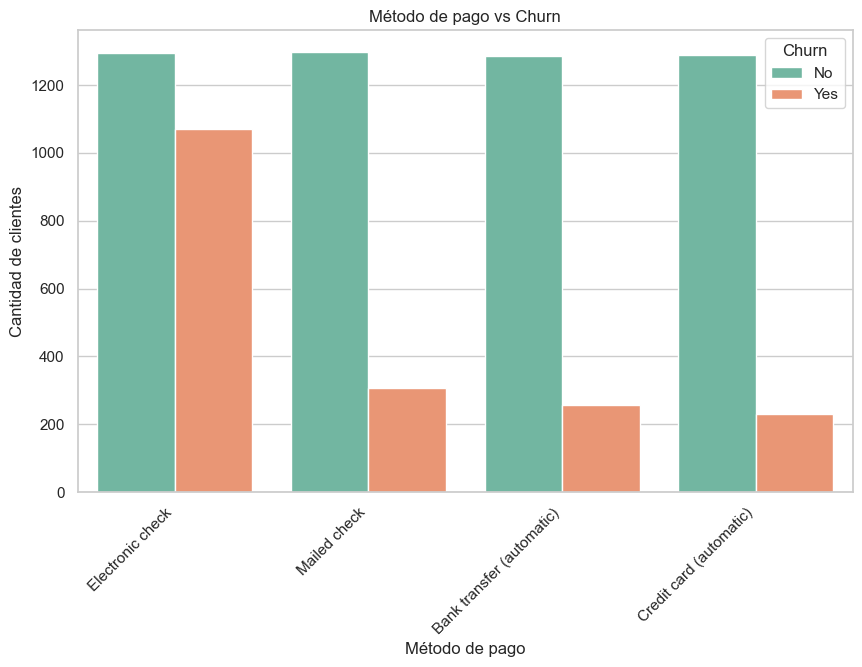


--- Porcentaje de Churn por Método de Pago ---
Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.27  16.73
Credit card (automatic)    84.75  15.25
Electronic check           54.71  45.29
Mailed check               80.80  19.20

🔍 Conclusión:
- El método 'Electronic check' tiene la tasa de churn más alta.
- Los métodos automáticos (bancarios o tarjeta) presentan tasas de churn más bajas.
- Esto sugiere que el método de pago podría estar relacionado con el nivel de compromiso del cliente.


In [17]:
# Gráfico: Método de pago vs churn
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set2')
plt.title('Método de pago vs Churn')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45, ha='right')
plt.show()

# Porcentaje de churn por método de pago
print("\n--- Porcentaje de Churn por Método de Pago ---")
pago_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
print(pago_churn.round(2))

# Conclusiones clave
print("\n🔍 Conclusión:")
print("- El método 'Electronic check' tiene la tasa de churn más alta.")
print("- Los métodos automáticos (bancarios o tarjeta) presentan tasas de churn más bajas.")
print("- Esto sugiere que el método de pago podría estar relacionado con el nivel de compromiso del cliente.")


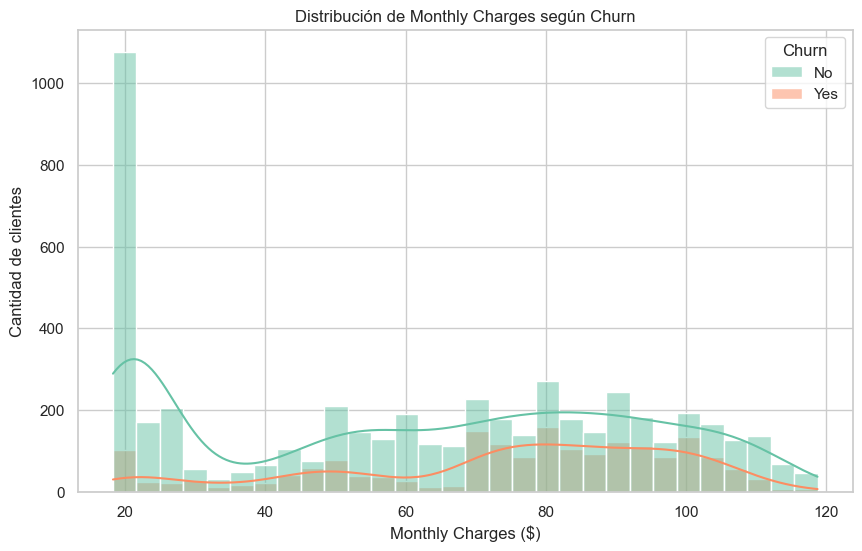


--- Promedio de Monthly Charges por grupo de Churn ---
Churn
No     61.31
Yes    74.44
Name: MonthlyCharges, dtype: float64

🔍 Conclusión:
- Los clientes que se van (Churn = Yes) tienden a pagar más al mes.
- Hay una acumulación de clientes sin churn en valores intermedios (entre $20 y $60).
- Podría haber una relación entre mayor carga mensual y cancelación del servicio.


In [18]:
# Histograma de MonthlyCharges segmentado por Churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True, palette='Set2')
plt.title('Distribución de Monthly Charges según Churn')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Cantidad de clientes')
plt.show()

# Promedio de MonthlyCharges por grupo
print("\n--- Promedio de Monthly Charges por grupo de Churn ---")
print(df.groupby('Churn')['MonthlyCharges'].mean().round(2))

# Conclusiones clave
print("\n🔍 Conclusión:")
print("- Los clientes que se van (Churn = Yes) tienden a pagar más al mes.")
print("- Hay una acumulación de clientes sin churn en valores intermedios (entre $20 y $60).")
print("- Podría haber una relación entre mayor carga mensual y cancelación del servicio.")


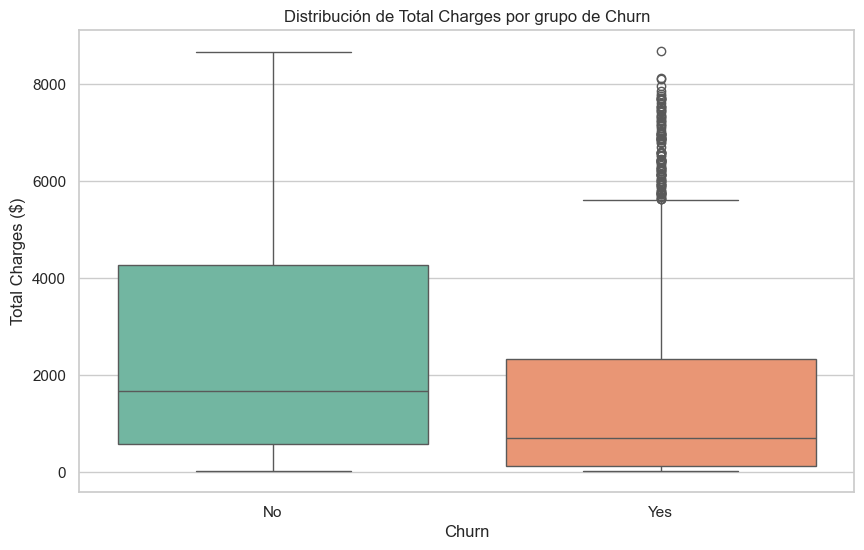


--- Promedio de Total Charges por grupo de Churn ---
Churn
No     2555.34
Yes    1531.80
Name: TotalCharges, dtype: float64

--- Desviación estándar de Total Charges ---
Churn
No     2329.46
Yes    1890.82
Name: TotalCharges, dtype: float64

🔍 Conclusión:
- Los clientes que NO hacen churn (se quedan) han pagado más históricamente.
- Los que hacen churn tienen facturación total baja, indicando que son clientes nuevos o poco comprometidos.
- TotalCharges parece estar correlacionado con el tiempo como cliente.


In [19]:
# Boxplot de TotalCharges por Churn
sns.boxplot(data=df, x='Churn', y='TotalCharges', hue='Churn', palette='Set2', legend=False)
plt.title('Distribución de Total Charges por grupo de Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges ($)')
plt.show()

# Promedios por grupo
print("\n--- Promedio de Total Charges por grupo de Churn ---")
print(df.groupby('Churn')['TotalCharges'].mean().round(2))

# Desviaciones estándar por grupo
print("\n--- Desviación estándar de Total Charges ---")
print(df.groupby('Churn')['TotalCharges'].std().round(2))

# Conclusión
print("\n🔍 Conclusión:")
print("- Los clientes que NO hacen churn (se quedan) han pagado más históricamente.")
print("- Los que hacen churn tienen facturación total baja, indicando que son clientes nuevos o poco comprometidos.")
print("- TotalCharges parece estar correlacionado con el tiempo como cliente.")


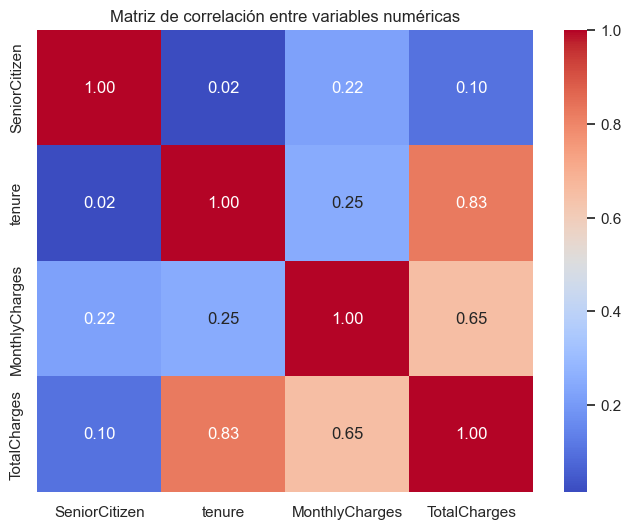


🔍 Conclusión:
- Existe una fuerte correlación entre 'TotalCharges' y 'tenure' (~0.83).
- 'MonthlyCharges' y 'TotalCharges' están moderadamente correlacionadas (~0.65).
- 'SeniorCitizen' tiene poca correlación lineal directa con otras variables numéricas.


In [20]:
# Seleccionamos solo variables numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Matriz de correlación
correlation_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# Conclusiones clave
print("\n🔍 Conclusión:")
print("- Existe una fuerte correlación entre 'TotalCharges' y 'tenure' (~0.83).")
print("- 'MonthlyCharges' y 'TotalCharges' están moderadamente correlacionadas (~0.65).")
print("- 'SeniorCitizen' tiene poca correlación lineal directa con otras variables numéricas.")
